<a href="https://colab.research.google.com/github/Mukeshvudayagiri/upgrad-mlops-intro/blob/main/Clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Application of KMeans Clustering

## Dataset

- Hand-written digits dataset
- MNIST (Modified National Institute of Standards and Technology) database ([uci link](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits))
- Commonly used for classification and clustering exercises

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.data[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
digits.target[1780]

2

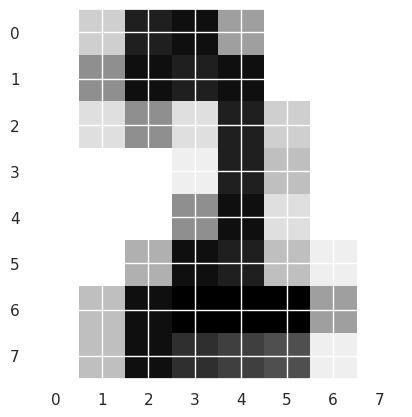

In [16]:
plt.imshow(digits.data[1780].reshape((8,8)), cmap=plt.cm.binary);

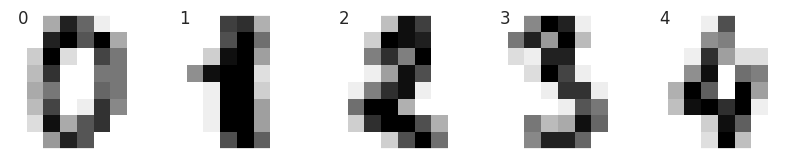

In [13]:
fig = plt.figure(figsize=(10,3))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape((8,8)), cmap=plt.cm.binary)
    ax.text(0,0,digits.target[i])

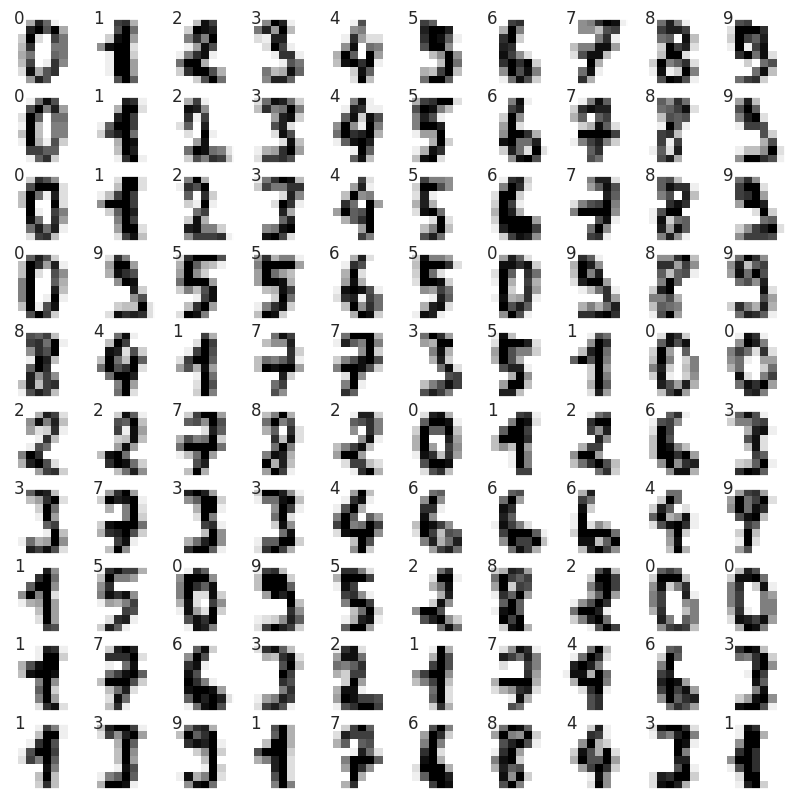

In [17]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10,10*i+j+1, xticks=[], yticks=[])
        ax.imshow(digits.data[10*i+j].reshape((8,8)), cmap=plt.cm.binary)
        ax.text(0,0,digits.target[10*i+j])

In [19]:
from sklearn.cluster import KMeans
# est = KMeans(n_clusters=10, precompute_distances=False, algorithm='full', max_iter=100)
est = KMeans(n_clusters=10, algorithm='full', max_iter=100)
clusters = est.fit_predict(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KNN is a clustering algorhtim where we have an input (X) and output (y). We pass both Input and output. Similarly, in KNN we have predict. here we don't pass output; the objective is the model should predict the output.

Whereas, sklearn is a un-supervised learning, where it accepts only Input (X) and not output (y).

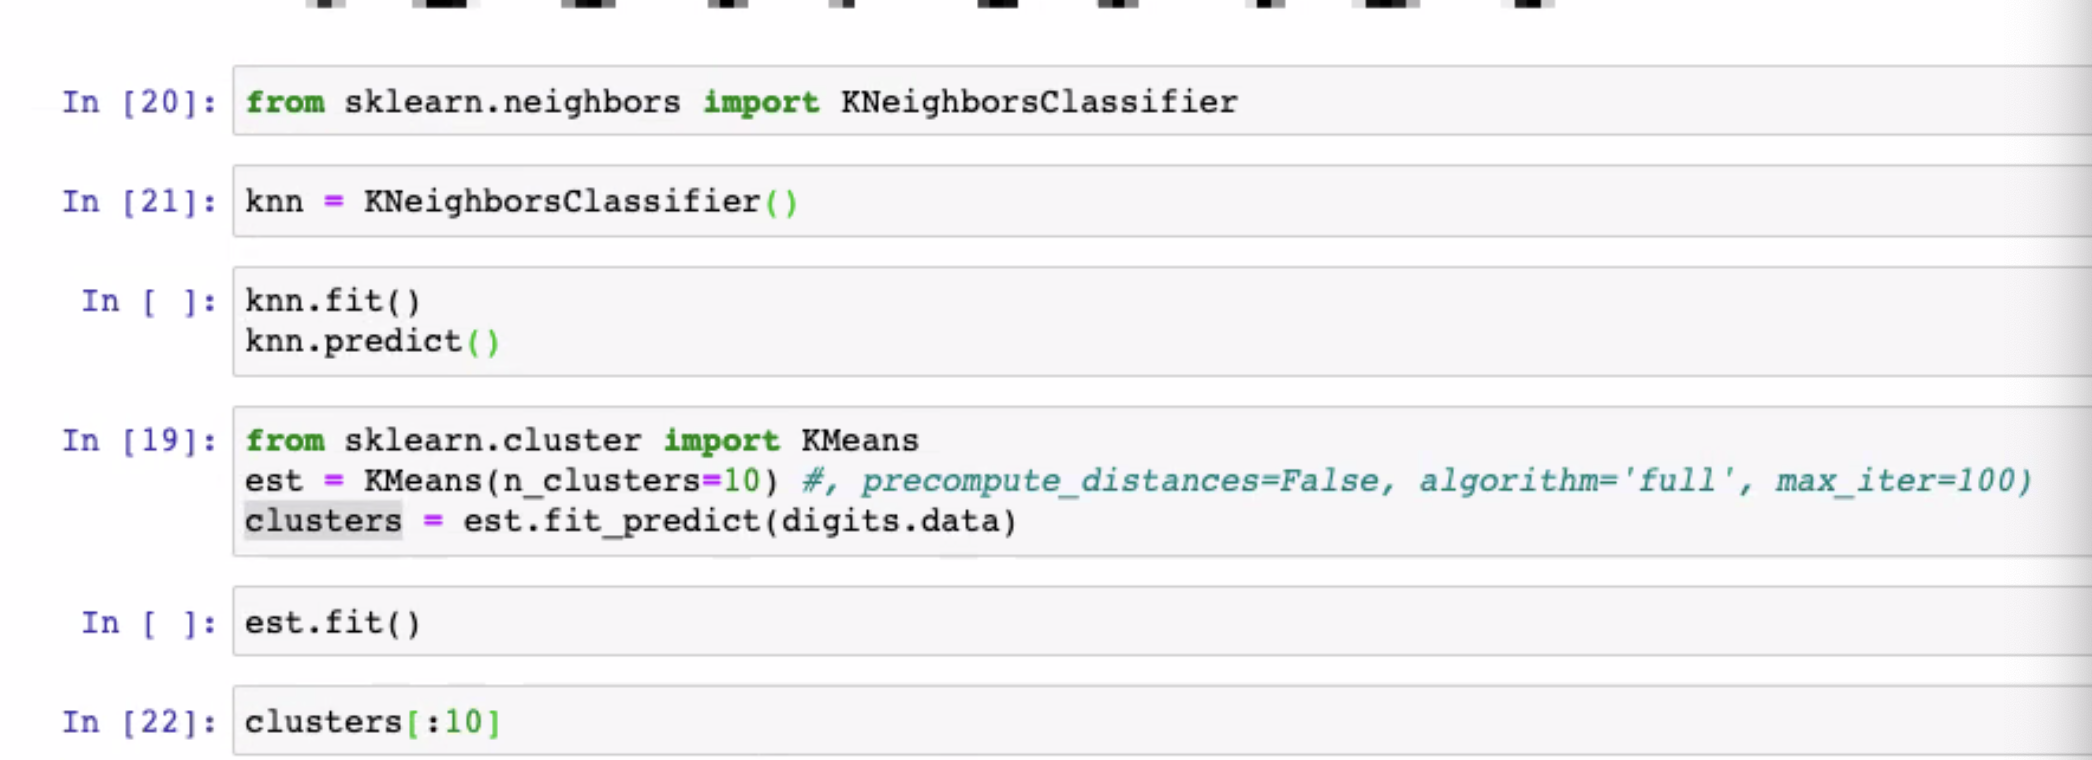

In [20]:
clusters[:10]

array([7, 3, 3, 8, 6, 0, 2, 1, 0, 0], dtype=int32)

In [21]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
est.cluster_centers_.shape

(10, 64)

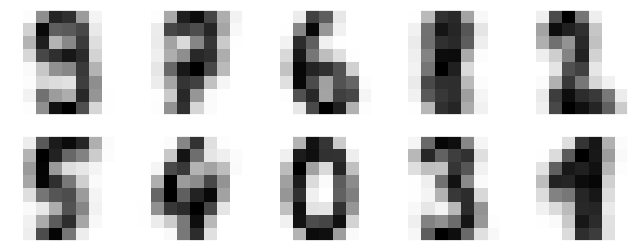

In [23]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [24]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

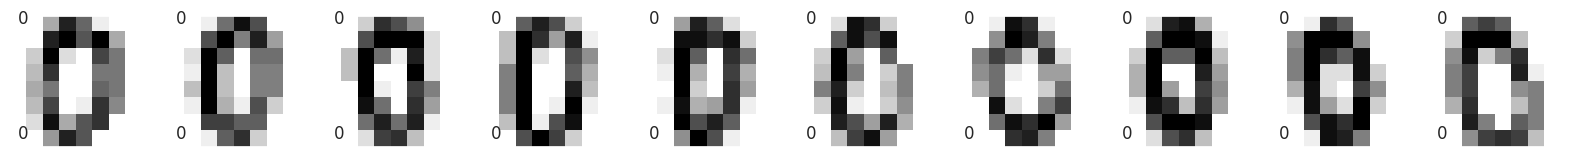

In [25]:
label = 0
fig = plt.figure(figsize=(20,3))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ax.imshow(digits.data[labels==label][i].reshape((8,8)), cmap=plt.cm.binary)
    ax.text(0,0,digits.target[labels==label][i])
    ax.text(0,7,labels[labels==label][i])

# Visualizing the clusters

- Visualization in 64D space?
    - Compress to visualizable dimensions

In [ ]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

In [ ]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax1.set_title('learned cluster labels')

sc = ax2.scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax2.set_title('true labels')
fig.legend(*sc.legend_elements(), loc='upper right');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

In [ ]:
plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');